In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
import time
from Trainer import MulticlassTrainer
from util import measure_inference_speed, count_trainable_parameters
from DatasetReader import *

#Faça o clone do repositorio: #https://github.com/LeeJunHyun/Image_Segmentation/blob/master/network.py
#Adicione o local do clone para poder fazer os imports das UNets
#O treinamento dessas redes foi feito no colab, então será necessário adaptar este script para a execução
sys.path.append("/mnt/TUDAO/Image_Segmentation")
from network import U_Net
from network import AttU_Net
from network import R2AttU_Net

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './LeeJunUNets/'

In [2]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


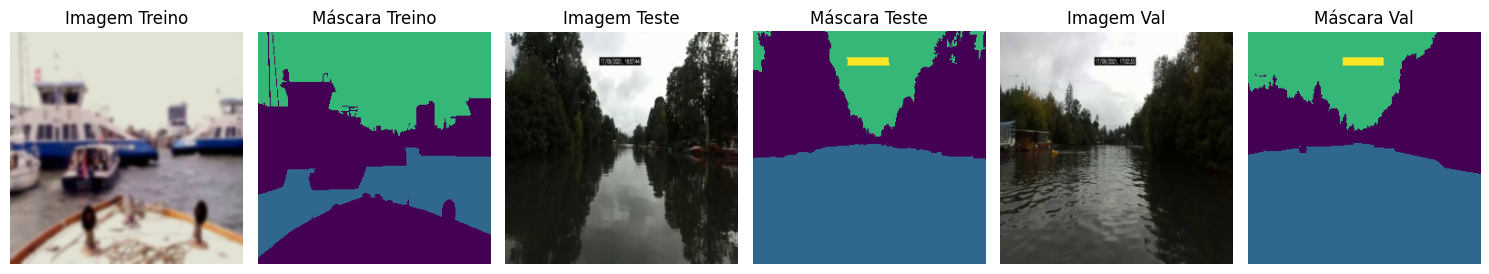

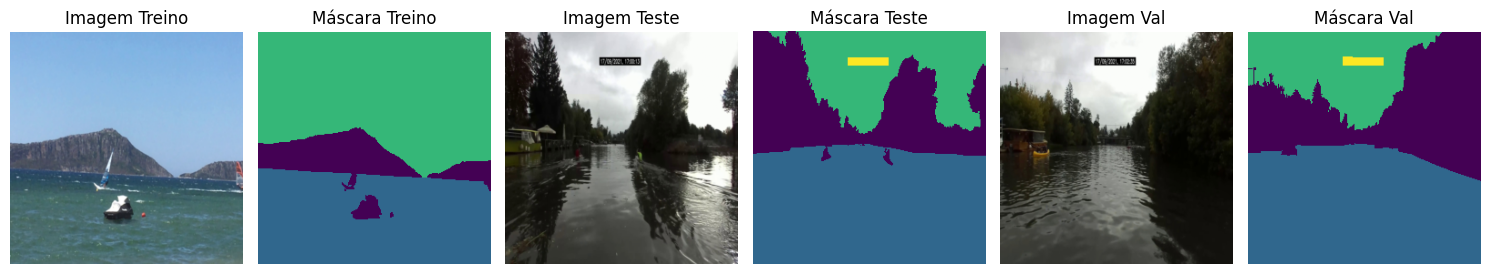

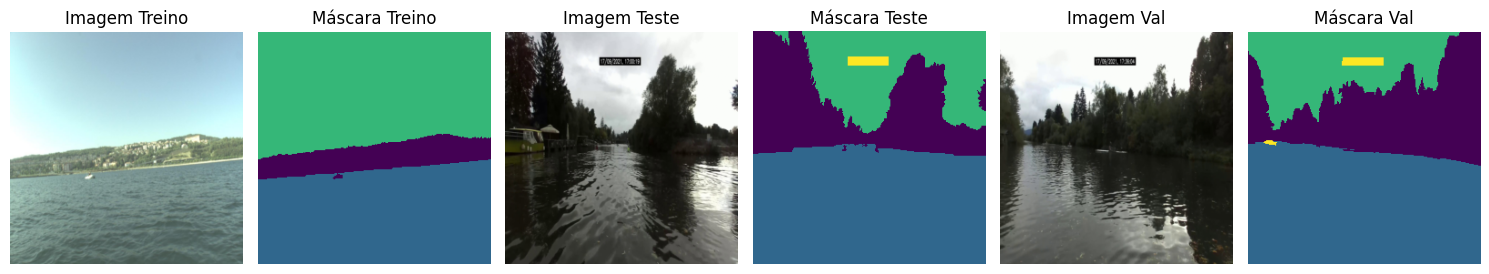

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3, num_classes=config.num_classes)

In [ ]:
def train(model, model_name=None,learning_rate = 1e-3,epochs = 300, re_evaluate=False):

    model_filename = f'{model_name}-epochs{epochs}.pth'

    print(count_trainable_parameters(model,format=True))
    
    trainer = MulticlassTrainer(num_classes=config.num_classes,
                    model_filename=model_filename, 
                    model_dir=result_path, 
                    info={'config':''},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            verbose=1, 
                            save_every=5, 
                            learning_rate=learning_rate,
                            continue_from_last=True)
    model.to(device)
    del model
    clear_gpu()
    if re_evaluate:
        trainer.evaluate_model(test_loader, print_stats=True)



In [ ]:
model = U_Net(img_ch=in_channels, output_ch=num_classes)
train(model,'U_Net-1')

In [ ]:
model = AttU_Net(img_ch=in_channels, output_ch=num_classes)
train(model,'AttU_Net-2')

In [ ]:
model = R2AttU_Net(img_ch=in_channels, output_ch=num_classes)
train(model,'R2AttU_Net-3')